Name: Batyr Kenzheakhmetov

ID: 000801267

Honor code: I have neither given nor received unauthorized aid in completing this work, nor have I presented someone else’s work as my own.

In [1]:
# We connect to Google Drive to get the necessary files from there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Directories
# Base directory containing the dataset
b_dir = '/content/drive/MyDrive/water_noWater'

# Directories for training, validation, and testing sets
train_dir = b_dir + '/train'
vali_dir = b_dir + '/validation'
test_dir = b_dir + '/test'

# Directories for cats and dogs in the training set
train_water = train_dir + '/water'
train_noWater = train_dir + '/noWater'

# Directories for cats and dogs in the validation set
vali_water = vali_dir + '/water'
vali_noWater = vali_dir + '/noWater'

# Directories for cats and dogs in the test set
test_water = test_dir + '/water'
test_noWater = test_dir + '/noWater'

import os, shutil
# Display the total number of images in each category
print('total training water images:', len(os.listdir(train_water)))
print('total training noWater images:', len(os.listdir(train_noWater)))
print('total validation water images:', len(os.listdir(vali_water)))
print('total validation noWater images:', len(os.listdir(vali_noWater)))
print('total test water images:', len(os.listdir(test_water)))
print('total test noWater images:', len(os.listdir(test_noWater)))

total training water images: 157
total training noWater images: 165
total validation water images: 17
total validation noWater images: 18
total test water images: 9
total test noWater images: 8


In [6]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

# Importing necessary function from Keras utilities for loading image datasets from directories
from keras.utils import image_dataset_from_directory

# Creating train dataset from images in train_dir directory with image size of (180, 180) and batch size of 32
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(512, 512),
    batch_size=16)
# Creating validation dataset from images in vali_dir directory with image size of (180, 180) and batch size of 32
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(512, 512),
    batch_size=4)
# Creating test dataset from images in test_dir directory with image size of (180, 180), batch size of 32, and no shuffling
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(512, 512),
    batch_size=4,
    shuffle=False)


Found 322 files belonging to 2 classes.
Found 35 files belonging to 2 classes.
Found 17 files belonging to 2 classes.


In [ ]:
# Load the VGG19 model pre-trained on ImageNet dataset
# Exclude the fully connected layers (top layers) since we might have different classes
# Set the input shape to (512, 512, 3), indicating an image size of 512x512 pixels with 3 color channels (RGB)
conv_base = keras.applications.vgg19.VGG19(
    weights="imagenet",  # Using pre-trained weights on ImageNet
    include_top=False,   # Exclude the fully connected layers
    input_shape=(512, 512, 3)  # Specify input shape
)

conv_base.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
from keras import regularizers

# Adding a data augmentation stage and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


# Define the input shape for the model
inputs = keras.Input(shape=(512, 512, 3))
x = data_augmentation(inputs)                                         # Apply data augmentation to the input data
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)                                                      # Pass the preprocessed input data through the convolutional base
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)                    # Add a dense output layer with a single unit and sigmoid activation for binary classification
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",                             # Compile the model with binary cross-entropy loss, RMSprop optimizer, and accuracy metric
              optimizer="rmsprop",
              metrics=["accuracy"])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 512, 512, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 512, 512, 3)       0         
 )                                                               
                                                                 
 vgg19 (Functional)          (None, 16, 16, 512)       20024384  
                                                                 
 flatten (Flatten)           (None, 131072)            0     

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/HW8_water_noWater.h5", # legacy format
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
21/21 [==============================] - ETA: 0s - loss: 119.8083 - accuracy: 0.6087

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 59s 2s/step - loss: 119.8083 - accuracy: 0.6087 - val_loss: 44.9471 - val_accuracy: 0.5143
Epoch 2/20
21/21 [==============================] - 11s 477ms/step - loss: 49.8885 - accuracy: 0.7391 - val_loss: 40.4810 - val_accuracy: 0.5429
Epoch 3/20
21/21 [==============================] - 12s 543ms/step - loss: 35.7918 - accuracy: 0.7826 - val_loss: 26.4609 - val_accuracy: 0.6286
Epoch 4/20
21/21 [==============================] - 13s 553ms/step - loss: 21.3693 - accuracy: 0.8168 - val_loss: 8.6328 - val_accuracy: 0.8857
Epoch 5/20
21/21 [==============================] - 11s 466ms/step - loss: 21.1450 - accuracy: 0.8323 - val_loss: 11.2345 - val_accuracy: 0.8857
Epoch 6/20
21/21 [==============================] - 11s 478ms/step - loss: 8.4954 - accuracy: 0.8820 - val_loss: 9.1318 - val_accuracy: 0.8000
Epoch 7/20
21/21 [==============================] - 11s 473ms/step - loss: 6.8878 - accuracy: 0.8851 - val_loss: 17.1008 - val_accuracy: 0.8571
Ep

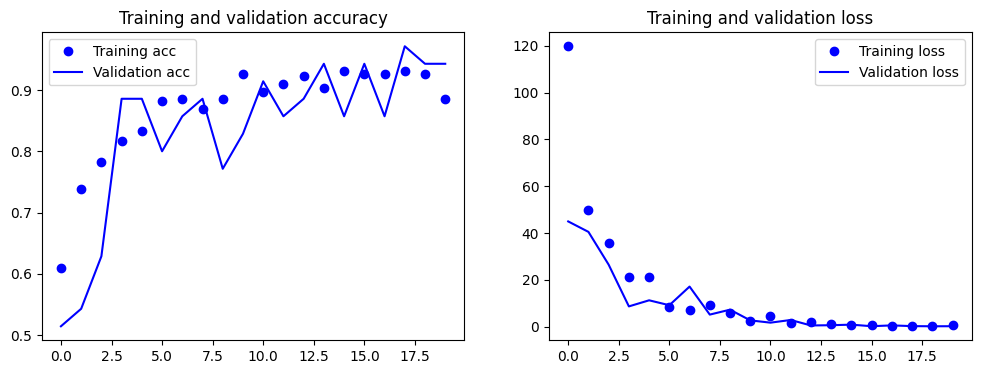

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"accuracy: {100*acc :5.2f}%")

In [ ]:
conv_base.trainable = True

for layer in conv_base.layers[:-4]:
  layer.trainable = False

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/HW8_water_noWater_FT.h5", # legacy format
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
21/21 [==============================] - 17s 570ms/step - loss: 0.0865 - accuracy: 0.9845 - val_loss: 0.1128 - val_accuracy: 0.9714
Epoch 2/20
21/21 [==============================] - 16s 707ms/step - loss: 0.0460 - accuracy: 0.9845 - val_loss: 0.0830 - val_accuracy: 0.9714
Epoch 3/20
21/21 [==============================] - 15s 704ms/step - loss: 0.0587 - accuracy: 0.9720 - val_loss: 0.0746 - val_accuracy: 0.9714
Epoch 4/20
21/21 [==============================] - 12s 528ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0792 - val_accuracy: 0.9429
Epoch 5/20
21/21 [==============================] - 11s 495ms/step - loss: 0.0369 - accuracy: 0.9876 - val_loss: 0.3277 - val_accuracy: 0.9143
Epoch 6/20
21/21 [==============================] - 14s 619ms/step - loss: 0.0462 - accuracy: 0.9876 - val_loss: 0.0631 - val_accuracy: 0.9714
Epoch 7/20
21/21 [==============================] - 12s 509ms/step - loss: 0.0192 - accuracy: 0.9907 - val_loss: 0.1668 - val_accuracy: 0.9143

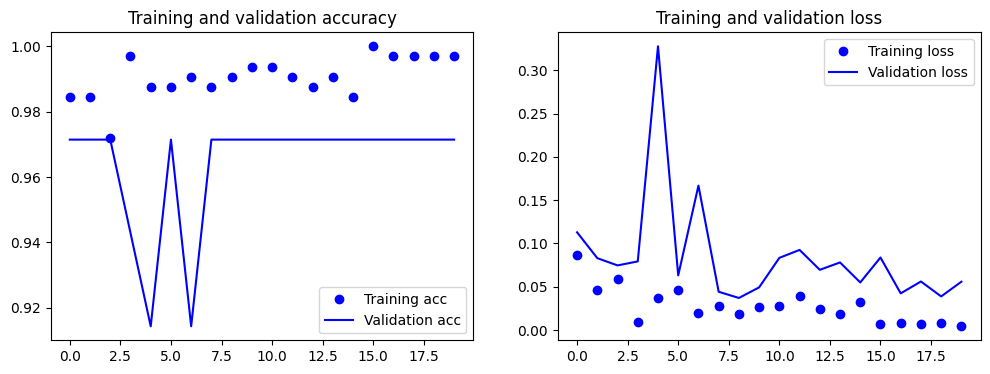

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [7]:
v_model = keras.models.load_model("/content/drive/MyDrive/HW8_water_noWater_FT.h5")
test_loss, test_acc = v_model.evaluate(test_dataset)
print(f"test acc: {test_acc*100.0:.2f}%")

5/5 [==============================] - 12s 874ms/step - loss: 0.0071 - accuracy: 1.0000
test acc: 100.00%
